In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# imports
import pandas as pd # Para trabajar con DataFrames
import numpy as np # Para trabajar numéricamente
import matplotlib.pyplot as plt # Para representar
import matplotlib.ticker as mticker # Para modificar formato de los números de un eje


In [ ]:
# Rutas de las bases de datos
ruta_base = "/content/drive/MyDrive/IronHack/" # Drive Albert y Bader

path_excel = ruta_base + "Lexique - Data Analyst.xlsx"
path_fees_csv = ruta_base + "extract - fees - data analyst - .csv"
path_cash_request_csv = ruta_base + "extract - cash request - data analyst.csv"

In [ ]:
# Cargar los datos
df_excel = pd.read_excel(path_excel)
df_fees = pd.read_csv(path_fees_csv)
df_cash_request = pd.read_csv(path_cash_request_csv)

# Entender los datos

In [ ]:
df_excel.head()

,Column name,Description
0,id,Unique ID of the fee object
1,type,Type of fee\nPossible values are :\n\n- instan...
2,status,Status of the fees (= does the fees was succes...
3,category,Describe the reason of the incident fee.\n\n2 ...
4,reason,Description of the fee


In [ ]:
print(str(df_excel["Description"][0]))

Unique ID of the fee object


In [ ]:
print(str(df_excel["Description"][1]))

Type of fee
Possible values are :

- instant_payment : fees for instant cash request (send directly after user's request, through SEPA Instant Payment) 
- split_payment : futures fees for split payment (in case of an incident, we'll soon offer the possibility to our users to reimburse in multiples installements)
- incident : fees for failed reimbursement. Created after a failed direct debit
- postpone : fees created when a user want to postpone the reimbursment of a CR


In [ ]:
print(str(df_excel["Description"][2]))

Status of the fees (= does the fees was successfully charged)

Possibles values are : 
- confirmed : the user made an action who created a fee. It will normally get charged at the moment of the CR's reimbursement. In some rare cases, postpones are confirmed without being charges due to a commercial offer.
- rejected : the last attempt to charge the fee failed.
- cancelled : fee was created and cancelled for some reasons. It's used to fix issues with fees but it mainly concern postpone fees who failed. We are charging the fees at the moment of the postpone request. If it failed, the postpone is not accepted and the reimbursement date still the same.
- accepted : fees were successfully charged


In [ ]:
print(str(df_excel["Description"][3]))

Describe the reason of the incident fee.

2 possibles values : 

- rejected_direct_debit : fees created when user's bank rejects the first direct debit
- month_delay_on_payment : fees created every month until the incident is closed


In [ ]:
df_fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [ ]:
df_fees["id"].value_counts().max() # IDs son unicos solo hay uno.

1

In [ ]:
df_fees["cash_request_id"].value_counts().max() # IDs son unicos solo hay uno.

35

In [ ]:
df_fees[df_fees["cash_request_id"]==11714.0]

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
9185,3293,11714.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 11714,2020-08-10 14:58:20.324765+00,2020-10-13 14:25:02.659654+00,2020-12-08 17:13:10.415287+00,NaN,NaN,after
19278,12578,11714.0,incident,accepted,month_delay_on_payment,5.0,month delay on payment - 10/2020,2020-10-10 23:26:31.632893+00,2020-10-13 14:25:03.353131+00,2020-12-08 17:13:10.481169+00,NaN,NaN,after


In [ ]:
df_fees[df_fees["status"]=="rejected"]

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
27,14433,10287.0,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-10-17 22:19:48.806283+00,2020-10-17 22:19:48.806303+00,2020-12-17 14:33:35.516056+00,NaN,NaN,after
42,19333,25769.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25769,2020-10-28 18:26:09.582877+00,2020-12-09 15:28:23.861333+00,2020-12-07 16:54:02.237895+00,NaN,NaN,after
43,21158,19981.0,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-11-01 22:13:59.433935+00,2020-11-01 22:13:59.433955+00,NaN,NaN,NaN,after
45,7039,15474.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 15474,2020-09-10 09:02:36.065377+00,2020-10-13 14:25:10.130414+00,2020-10-29 04:25:24.559928+00,NaN,NaN,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,14707,22050.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 22050,2020-10-19 06:48:13.655092+00,2020-10-19 06:48:13.655116+00,2020-12-09 05:31:25.53595+00,NaN,NaN,after
21056,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,NaN,NaN,after
21057,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,NaN,NaN,after
21058,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,NaN,NaN,after


In [ ]:
df_fees[(df_fees["status"]=="accepted") & (df_fees["type"]=="incident")]

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
7,14187,14839.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-16 23:48:50.655967+00,2020-10-16 23:48:50.655988+00,2020-11-05 14:15:36.600041+00,NaN,NaN,after
15,14420,17963.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-17 22:18:53.924407+00,2020-10-17 22:18:53.924429+00,2020-10-17 22:19:00.10911+00,NaN,NaN,after
40,14188,15989.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-16 23:48:52.16855+00,2020-10-16 23:48:52.168578+00,2020-11-16 13:33:09.113667+00,NaN,NaN,after
44,13583,12952.0,incident,accepted,month_delay_on_payment,5.0,month delay on payment - 10/2020,2020-10-15 01:30:20.818256+00,2020-10-15 01:30:20.818285+00,2021-01-05 08:14:03.797188+00,NaN,NaN,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20884,17568,17145.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-25 22:27:14.049811+00,2020-10-25 22:27:14.049833+00,2021-02-09 09:34:49.144344+00,NaN,NaN,after
20935,12719,11316.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-11 22:49:05.100421+00,2020-10-13 14:25:18.669487+00,2021-02-06 02:56:32.018322+00,NaN,NaN,after
21002,15712,17921.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-21 22:22:56.19283+00,2020-10-21 22:22:56.192851+00,2021-02-08 03:14:56.324535+00,NaN,NaN,after
21009,14209,15088.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-16 23:49:42.0478+00,2020-10-16 23:49:42.04783+00,2021-02-07 03:10:48.554195+00,NaN,NaN,after


In [ ]:
df_cash_request.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [ ]:
df_cash_request[df_cash_request["recovery_status"] != np.NaN]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN


In [ ]:
df_cash_request["id"].value_counts().max() # IDs son unicos solo hay uno.

1

In [ ]:
df_cash_request["user_id"].value_counts().max()

19

In [ ]:
df_cash_request[df_cash_request["id"] == 11714]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
23640,11714,100.0,money_back,2020-08-10 13:15:54.291488+00,2020-12-18 13:15:48.484301+00,16158.0,2020-08-10 14:58:19.039748+00,NaN,2020-09-07 22:00:00+00,2020-08-12,2020-12-02 03:02:41.180953+00,instant,2020-08-17 13:15:54.290998+00,completed,2020-09-09 20:51:17.992852+00,2020-10-10 22:58:13.306027+00


# Análisis Exploratorio de Datos (Fees)

## Alcance financiero de IronHack.

* **¿Qué se busca comprender con este análisis?**

El próposito es el de hacer un análisis sobre el rendimiento financiero de IronHack en su servicio de Adelantamiento de Fondos. En este caso cuántos ingresos ha obtenido IronHack Payments con la modalidad de intereses aplicados sobre el adelantamiento de capital. Esto proporciona una visión clara de la eficiencia con la que la organización procesa y acepta sus pagos, permitiendo una mejor planificación financiera.

* **¿A través de qué métricas se busca?**

El análisis se centra en cuatro métricas principales:

1. El número de transacciones exitosas (ventas realizadas). Específicamente, se seleccionan las filas con el estado "accepted" y se cuentan cuantas transacciones ha habido de este estado.
2. La cantidad ingresada por estas transacciones. Específicamente, se seleccionan las filas con el estado "accepted" y se suman los valores correspondientes en la columna "total_amount" para cuantificar el total de ingresos que IronHack ha generado a través de estas transacciones.
3. La media de cada una de esas transacciones.
4. Los valores extremos (máximos y mínimos) y únicos de las transacciones.

* **Conclusión del análisis realizado**

Se concluye que IronHack ha ingresado 74.210 € con las 14.840 transacciones que ha realizado siendo todas transacciones de intereses de 5 € (a excepción de una de 10 €).

### ¿Cuantos ingresos ha tenido IronHack? (Sum Accepted)

In [ ]:
# Se seleccionan las filas "accepted" (where fees were successfully charged)
accepted = df_fees[df_fees["status"] == "accepted"]

# Se suma la cantidad de ingresos
accepted["total_amount"].sum()

74210.0

### ¿Cuantas ventas ha hecho IronHack? (Count Accepted)

In [ ]:
# Se seleccionan las filas "accepted" (where fees were successfully charged)
accepted = df_fees[df_fees["status"] == "accepted"]

# Se cuenta la cantidad de ventas hechas
accepted["total_amount"].count()

14841

### ¿Cuál es el ingreso medio por venta? (Ingreso/nº ventas)

In [ ]:
# Se divide los ingresos totales por las ventas hechas.
accepted["total_amount"].sum() / accepted["total_amount"].count()

5.000336904521259

### ¿Cuál es el ingreso más alto y max bajo cobrado? (max Accepted y min Accepted)

In [ ]:
accepted["total_amount"].max()

10.0

In [ ]:
accepted["total_amount"].min()

5.0

In [ ]:
accepted["total_amount"].value_counts()

,count
total_amount,
5.0,14840
10.0,1


## Pérdidas de IronHack debido a incidentes y cancelaciones

* **¿Qué se busca comprender con este análisis?**

El objetivo de este análisis es cuantificar la pérdida financiera total y media asociada a las transacciones que no se pudieron completar, ya sea por incidentes o por cancelaciones, y calcular el ingreso medio perdido por cada transacción no completada.  Al examinar cuántas transacciones fallaron y cuánto dinero no se recaudó en consecuencia, se pretende identificar la magnitud del impacto que estos incidentes tienen sobre los ingresos de la empresa.

* **¿A través de qué métricas se busca?**

Para abordar las preguntas planteadas, se plantean las siguientes métricas clave:
1. Número de transacciones etiquetadas como "incident" o "cancelled" para medir la frecuencia de fallos de cobro.
2. Cantidad de dinero perdido.
3. Cantidad perdida en cada transacción.

Finalmente se representa la información de forma visual para facilitar la lectura de las métricas.

* **Conclusión del análisis realizado**

El análisis revela que existe un número significativo de transacciones que no se pudo completar (21.061 transacciones). Eso  resulta ser una pérdida considerable de ingresos para IronHack (49.810 € no recaudados, un 40,2% de las transacciones). Al comparar gráficamente las cantidades cobradas y no cobradas, se visualiza claramente el impacto de los incidentes y las cancelaciones.Además, el ingreso medio perdido por cada pago no completado es de 5.0 euros. Estas cifras, y las representaciones gráficas que proporcionan una perspectiva clara sobre el impacto financiero, son herramientas útiles para orientar decisiones estratégicas que mejoren la eficiencia operativa y minimicen pérdidas futuras. Subrayan una necesidad de abordar los problemas asociados a los pagos.





### ¿Cuantas veces no se ha podido hacer el pago? (Count incident + cancelled)

In [ ]:
# Se seleccionan los datos que tuvieron un incidente o fueron pospuestos
incident_cancelled = df_fees[(df_fees["type"] == "incident") | (df_fees["type"] == "postpone")]

# Se cuenta la cantidad de ventas hechas
df_fees["total_amount"].count()

21061

### ¿Cuánto dinero se perdió por pagos que no se pudieron hacer? (Sum incident + cancelled)

In [ ]:
# Se seleccionan los datos que tuvieron un incidente o fueron cancelados
incident_postpone = df_fees[(df_fees["type"] == "incident") | (df_fees["type"] == "postpone")]

# Se suma la cantidad de ventas hechas
incident_postpone["total_amount"].sum()

49810.0

### ¿Cuánto dinero se perdió de en cada pago que no se pudo hacer? (Media = Sum incident+cancelled / Count incident+cancelled)

In [ ]:
incident_postpone["total_amount"].sum() / incident_cancelled["total_amount"].count()

5.0

In [ ]:
incident_postpone["total_amount"].value_counts()

,count
total_amount,
5.0,9962


### Comparación gráfica de las preguntas anteriores

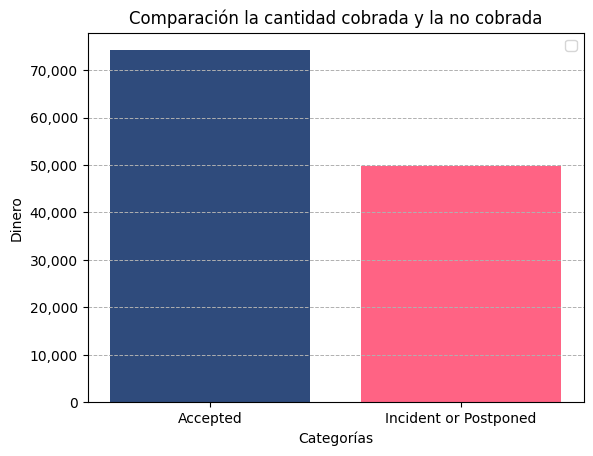

In [ ]:
# Datos
categorias = ['Accepted', 'Incident or Postponed']
valores = [accepted["total_amount"].sum(),  incident_postpone["total_amount"].sum()]

# Crear un gráfico de barras
plt.bar(categorias, valores, color=['#2f4b7c', '#FF6384'])
plt.xlabel('Categorías')
plt.ylabel('Dinero')
plt.title('Comparación la cantidad cobrada y la no cobrada')
plt.legend()
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}')) # Formatear el eje vertical con separadores de miles
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

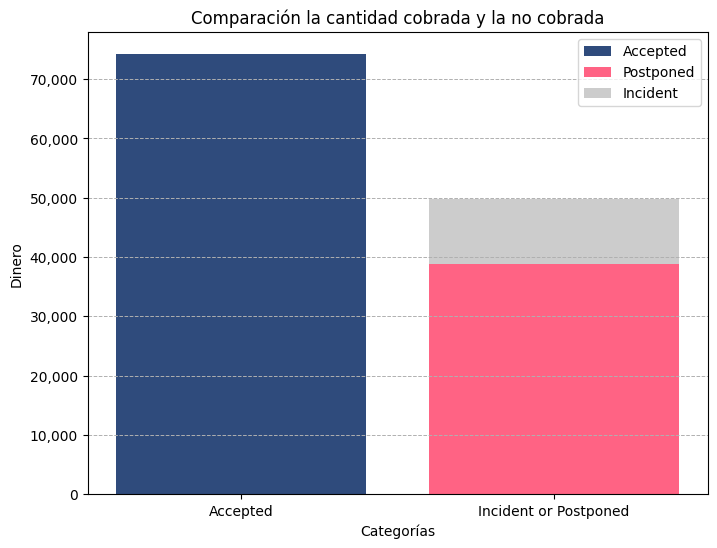

In [ ]:
# Subconjuntos
incident_postpone = df_fees[(df_fees["type"] == "incident") | (df_fees["type"] == "postpone")]
incident = df_fees[df_fees["type"] == "incident"]
postpone = df_fees[df_fees["type"] == "postpone"]

# Sumas de los valores de incident y postponed
incident_total = incident["total_amount"].sum()
postpone_total = postpone["total_amount"].sum()

# Datos para las barras
categorias = ['Accepted', 'Incident or Postponed']
accepted_total = accepted["total_amount"].sum()
incident_postpone_total = incident_total + postpone_total

# Crear el gráfico de barras apiladas
plt.figure(figsize=(8, 6))
# Barra para 'Accepted'
plt.bar(categorias[0], accepted_total, color='#2f4b7c', label='Accepted')
# Barras apiladas para 'Incident' y 'Postponed'
plt.bar(categorias[1], postpone_total, color='#FF6384', label='Postponed')
plt.bar(categorias[1], incident_total, bottom=postpone_total, color='#CCCCCC', label='Incident')
plt.xlabel('Categorías')
plt.ylabel('Dinero')
plt.title('Comparación la cantidad cobrada y la no cobrada') # Formatear el eje vertical con separadores de miles
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()

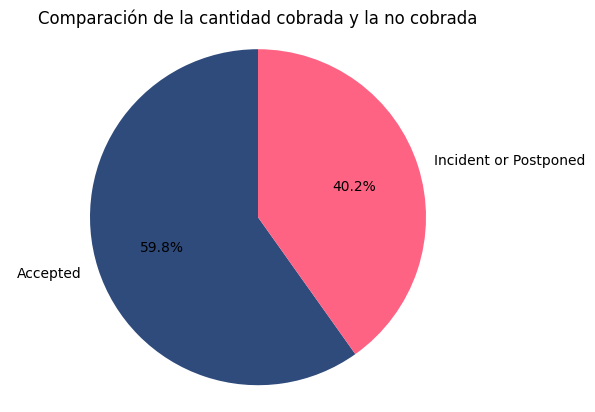

In [ ]:
# Datos
categorias = ['Accepted', 'Incident or Postponed']
valores = [accepted["total_amount"].sum(),  incident_postpone["total_amount"].sum()]

# Crear un gráfico de quesitos
plt.pie(valores, labels=categorias, autopct='%1.1f%%', startangle=90, colors=['#2f4b7c', '#FF6384'])
plt.title('Comparación de la cantidad cobrada y la no cobrada') # O equivalentemente número de transacciones cobradas y no cobradas (ya que la media de valor de las transacciones para ambas categorías es el mismo, de 5)
plt.axis('equal')
plt.show()

## Evolución temporal de los ingresos de IronHack

* **¿Qué se busca comprender con este análisi?**

Este análisis está diseñado para entender la evolución temporal de los ingresos de IronHack, separando claramente entre aquellos ingresos que se realizaron con éxito y aquellos que fallaron. Se busca identificar tendencias mensuales en el flujo de ingresos para entender las variaciones estacionales de la empresa.

Asimismo se quiere concretar e identificar tendencias temporales o meses concretos con diferencias entre los ingresos exitosos y las pérdidas de ingresos. Es decir, si hay meses donde disminuyen los ingresos exitosos y aumentan las pérdidas de ingresos o viceversa. Esto permitiría a IronHack detectar períodos de mayor riesgo y así implementar estrategias para mejorar el cobro y la previsibilidad financiera a lo largo del tiempo.

* **¿A través de qué métricas se busca?**

La métrica usada es la cantidad total de pagos aceptados y no realizados desglosados por mes. Esto se logra extrayendo los datos de las columnas "accepted", "incident" y "cancelled" y creando series temporales que permiten visualizar las fluctuaciones mensuales de los ingresos y pérdidas financieras.

* **Conclusión del análisis realizado**

El análisis realizado permite entender como son los ingresos de la empresa a lo largo del tiempo. En el gráfico se observa claramente un mayor ingreso en noviembre de 2020, siendo la temporada alta de recaudación entre septiembre y diciembre. Respecto a los datos, indicar que solo se tiene información de los ingresos entre junio de 2020 y febrero de 2021, desconociendo los datos de la empresa fuera de este periodo, hecho que limita el análisis. Respecto a la calidad de los datos de ingresos, indicar que solo un 2,7% de los datos de ingresos aceptados tienen incorrecciones en las fechas.

El análisis realizado no permite entender como son las pérdidas de la empresa a lo largo del tiempo. Solo se tiene información de los incidentes y cancelaciones entre agosto de 2020 y diciembre de 2020, lo que limita mucho el análisis. Respecto a la calidad de estos datos, esta es muy pobre ya que en un 99,2 % de los casos hay incorreciones en las fechas. Este hecho impide poder comprender la evolucón temporal de las pérdidas de la empresa y poder compararla con los ingresos reales.

### Ingresos por mes (Accepted vs "Date")

#### Ingresos por mes (Accepted vs updated_at)


In [ ]:
# Se seleccionan las filas "accepted" (where fees were successfully charged)
accepted = df_fees[df_fees["status"] == "accepted"]

# Se convierte el dato a formato de fecha y se extrae el mes en una nueva columna "month"
accepted = accepted.copy()
accepted["month"] = pd.to_datetime(accepted["updated_at"]).dt.month

# Se convierte el dato a formato de fecha y se extrae el año en una nueva columna "year"
accepted["year"] = pd.to_datetime(accepted["updated_at"]).dt.year

In [ ]:
accepted.groupby("month")['total_amount'].value_counts()

month  total_amount
1      5.0               151
       10.0                1
2      5.0                 1
10     5.0             14521
11     5.0               156
12     5.0                11
Name: count, dtype: int64

In [ ]:
accepted.groupby("month")['total_amount'].sum()

,total_amount
month,
1,765.0
2,5.0
10,72605.0
11,780.0
12,55.0


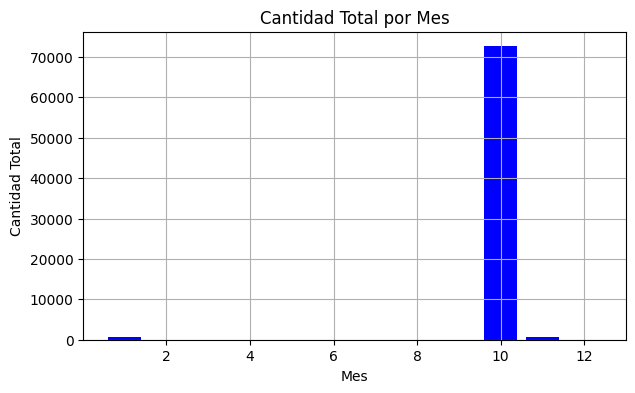

In [ ]:
# Agregar las cantidades por mes
monthly_totals = accepted.groupby('month')['total_amount'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(7, 4))
plt.bar(monthly_totals.index, monthly_totals.values, color='blue')
plt.xlabel('Mes')
plt.ylabel('Cantidad Total')
plt.title('Cantidad Total por Mes')
plt.grid(True)
plt.show()

In [ ]:
accepted.groupby("year")['total_amount'].sum()

,total_amount
year,
2020,73440.0
2021,770.0


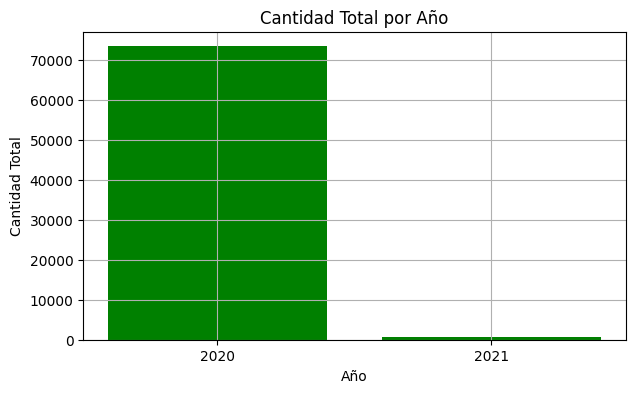

In [ ]:
# Agregar las cantidades por año
yearly_totals = accepted.groupby('year')['total_amount'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(7, 4))
plt.bar(yearly_totals.index.astype(str), yearly_totals.values, color='green')
plt.xlabel('Año')
plt.ylabel('Cantidad Total')
plt.title('Cantidad Total por Año')
plt.grid(True)
plt.show()

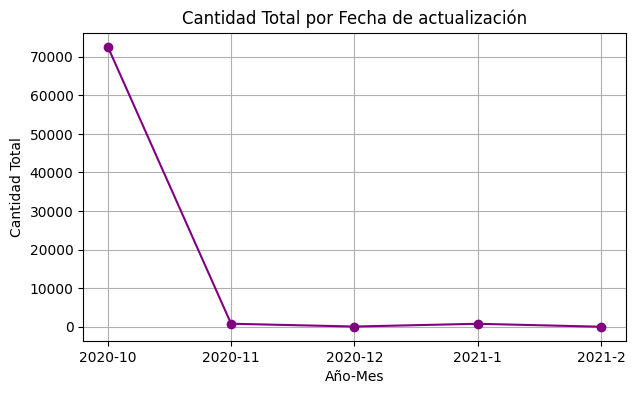

In [ ]:
# Crear una nueva columna para año y mes
accepted['year_month'] = accepted['year'].astype(str) + "-" + accepted['month'].astype(str)

# Agregar las cantidades por el mes de ese año
monthly_totals = accepted.groupby('year_month')['total_amount'].sum()

# Crear el gráfico de líneas
plt.figure(figsize=(7, 4))
plt.plot(monthly_totals.index, monthly_totals.values, marker='o', color='purple', linestyle='-')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad Total')
plt.title('Cantidad Total por Fecha de actualización')
plt.grid(True)

#### Ingresos por mes (Accepted vs paid_at)

Se repite lo anterior con las fechas paid_at en vez de updated_at

In [ ]:
# Se seleccionan las filas "accepted" (where fees were successfully charged)
accepted = df_fees[df_fees["status"] == "accepted"]

# Se convierte el dato a formato de fecha y se extrae el mes en una nueva columna "month"
accepted = accepted.copy()
accepted["month"] = pd.to_datetime(accepted["paid_at"], errors='coerce').dt.month

# Se convierte el dato a formato de fecha y se extrae el año en una nueva columna "year"
accepted["year"] = pd.to_datetime(accepted["paid_at"], errors='coerce').dt.year

<ipython-input-160-659e4fbae131>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted['year'] = accepted['year'].apply(lambda x: str(x).split('.')[0])


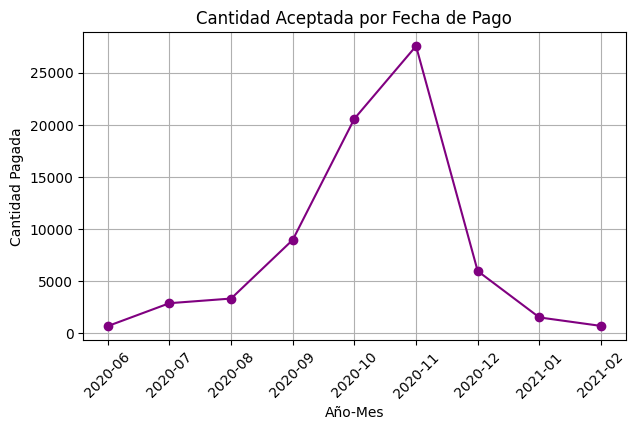

In [ ]:
# Eliminar filas que tengan NaN en 'year' o 'month'
accepted = accepted.dropna(subset=['year', 'month'])

# Convertir año y mes a cadenas, extraer la parte antes del punto (la parte entera del año y mes) y convertir los meses de 1 2 3 4 5 6 7 8 9 a 01 02 03 04 05 06 07 08 09
accepted['year'] = accepted['year'].apply(lambda x: str(x).split('.')[0])
accepted['month'] = accepted['month'].apply(lambda x: str(x).split('.')[0].zfill(2))

# Crear columna de año y mes como 'YYYY-MM'
accepted['year_month'] = accepted['year'] + "-" + accepted['month']

# Agregar las cantidades por el mes de ese año
monthly_totals = accepted.groupby('year_month')['total_amount'].sum()

# Crear el gráfico de líneas
plt.figure(figsize=(7, 4))
plt.plot(monthly_totals.index, monthly_totals.values, marker='o', color='purple', linestyle='-')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad Pagada')
plt.title('Cantidad Aceptada por Fecha de Pago')
plt.xticks(rotation=45)
plt.grid(True)

In [ ]:
# Cantidad de dinero no contabilizado debido a la pérdida de datos por eliminación de la fehca (problema de calidad de los datos)
74210.0 - accepted["total_amount"].sum()

1985.0

In [ ]:
# Porcentaje:
(74210.0 - accepted["total_amount"].sum())/74210*100

2.674841665543727

### Ingresos fallidos por fecha (Incident vs paid_at)

In [ ]:
# Se seleccionan los datos que tuvieron un incidente o fueron cancelados
incident_cancelled = df_fees[(df_fees["status"] == "incident") | (df_fees["status"] == "cancelled")]

# Se convierte el dato a formato de fecha y se extrae el mes en una nueva columna "month"
incident_cancelled = incident_cancelled.copy()
incident_cancelled["month"] = pd.to_datetime(incident_cancelled["paid_at"], errors='coerce').dt.month

# Se convierte el dato a formato de fecha y se extrae el año en una nueva columna "year"
incident_cancelled["year"] = pd.to_datetime(incident_cancelled["paid_at"], errors='coerce').dt.year

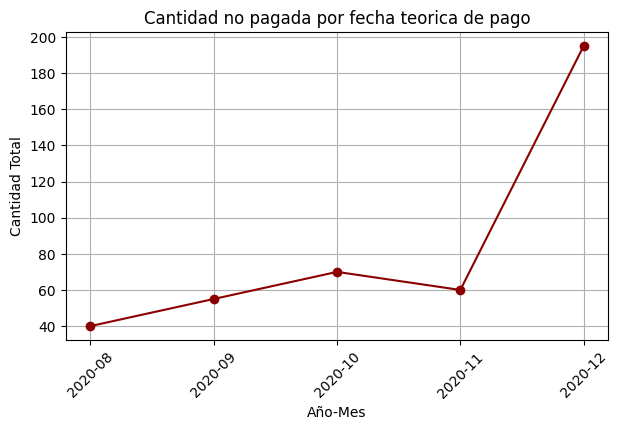

In [ ]:
# Eliminar filas que tengan NaN en 'year' o 'month'
incident_cancelled = incident_cancelled.dropna(subset=['year', 'month'])

# Convertir año y mes a cadenas, extraer la parte antes del punto (la parte entera del año y mes) y convertir los meses de 1 2 3 4 5 6 7 8 9 a 01 02 03 04 05 06 07 08 09
incident_cancelled['year'] = incident_cancelled['year'].apply(lambda x: str(x).split('.')[0])
incident_cancelled['month'] = incident_cancelled['month'].apply(lambda x: str(x).split('.')[0].zfill(2))

# Crear columna de año y mes como 'YYYY-MM'
incident_cancelled['year_month'] = incident_cancelled['year'] + "-" + incident_cancelled['month']

# Agregar las cantidades por el mes de ese año
monthly_totals = incident_cancelled.groupby('year_month')['total_amount'].sum()

# Crear el gráfico de líneas
plt.figure(figsize=(7, 4))
plt.plot(monthly_totals.index, monthly_totals.values, marker='o', color='darkred', linestyle='-')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad Total')
plt.title('Cantidad no pagada por fecha teorica de pago')
plt.xticks(rotation=45)
plt.grid(True)

In [ ]:
# Cantidad de dinero no contabilizado debido a la pérdida de datos por eliminación de la fehca (problema de calidad de los datos)
49810.0 - incident_cancelled["total_amount"].sum()

49390.0

In [ ]:
# Porcentaje:
(49810.0 - incident_cancelled["total_amount"].sum())/49810*100

99.1567958241317

### Combinación de los gráficos anteriores (Ingresos fallidos por fecha (Incident vs paid_at) VS Ingresos por mes (Accepted vs "Date")

Se representan los dos gráficos anteriores en un mismo eje

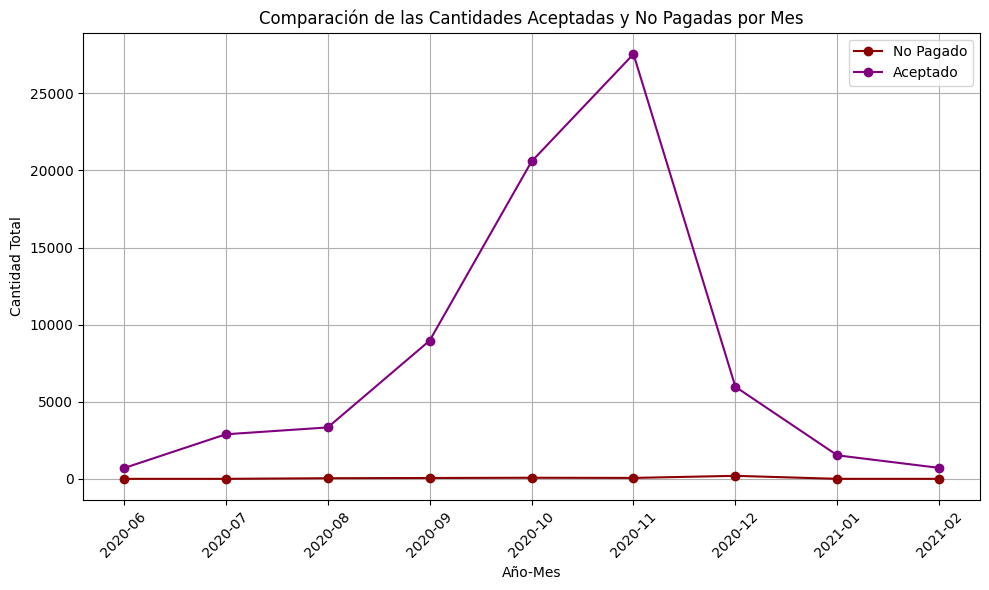

In [ ]:
# Definir el rango completo de fechas
rango_fechas = ["2020-06", "2020-07", "2020-08", "2020-09", "2020-10", "2020-11", "2020-12", "2021-01", "2021-02"]

# Convertir a DataFrame para cada conjunto de datos
monthly_totals_incident = incident_cancelled.groupby('year_month')['total_amount'].sum().reindex(rango_fechas, fill_value=0)
monthly_totals_accepted = accepted.groupby('year_month')['total_amount'].sum().reindex(rango_fechas, fill_value=0)

# Crear el gráfico de líneas para ambos conjuntos de datos en el mismo gráfico
plt.figure(figsize=(10, 6))
plt.plot(monthly_totals_incident.index, monthly_totals_incident.values, marker='o', color='darkred', linestyle='-', label='No Pagado')
plt.plot(monthly_totals_accepted.index, monthly_totals_accepted.values, marker='o', color='purple', linestyle='-', label='Aceptado')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad Total')
plt.title('Comparación de las Cantidades Aceptadas y No Pagadas por Mes')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## ¿Porcentaje de éxito de ventas? (Accepted/Total)

* **¿Qué se busca comprender con este análisi?**



* **¿A través de qué métricas se busca?**



* **Conclusión del análisis realizado**




In [ ]:
str((accepted["total_amount"].count() / (accepted["total_amount"].count() + incident_cancelled["total_amount"].count()) * 100).round(2)) + " %"

'99.42 %'

## ¿Cuantos días se ha tardado en pagar después de confirmar la compra? (media + boxplot)

* **¿Qué se busca comprender con este análisis?**

Este análisis pretende determinar el tiempo promedio que transcurre entre la confirmación de una compra y el pago efectivo en IronHack. Al evaluar los días de diferencia entre estas dos etapas, se busca entender el comportamiento del ciclo de cobro y detectar posibles retrasos que podrían afectar a la empresa. Se busca determinar la distribución del tiempo de pago para evaluar su heterogeneidad ya que un retraso en el pago suele implicar destinar mayor cantidad de recursos por la empresa y suele estar asociado con incidencias.

* **¿A través de qué métricas se busca?**

Para cuantificar el tiempo de pago, se utiliza la diferencia en días entre las fechas "created_at" y "paid_at" para cada transacción. La principal métrica derivada es el promedio de esta diferencia, complementado con un análisis de la distribución a través de un diagrama de cajas y bigotes que resalta la variabilidad, la mediana y los outliers.

* **Conclusión del análisis realizado**

El análisis revela que de promedio se tardan unos 26 días entre la confirmación de la compra y el pago. El boxplot complementario resalta las fluctuaciones en los tiempos de pago, identificando que el 50 % de los pagos se realizan entre 9 y 34 días después de confirmar la compra. Se detecta que en un 25 % de los casos el pago se realiza bastante temprano, antes de los 9 días. También hay una buena cantidad (un cuarto) de los pagos que son bastante tardíos, tardando entre 34 y 72 días. Finalmente en un 4,6 % de los casos los pagos se retrasan más de 72 días.


In [ ]:
df_fees = df_fees.copy()

# Convertir las columnas a formato datetime
df_fees['created_at'] = pd.to_datetime(df_fees['created_at'], errors='coerce')
df_fees['paid_at'] = pd.to_datetime(df_fees['paid_at'], errors='coerce')

# Eliminar NaN
df_fees.dropna(subset=['created_at', 'paid_at'])

# Calcular la diferencia en días
df_fees['days_difference'] = (df_fees['paid_at'] - df_fees['created_at']).dt.days

# Calcular la media de días
df_fees['days_difference'].mean()

25.797253530250032

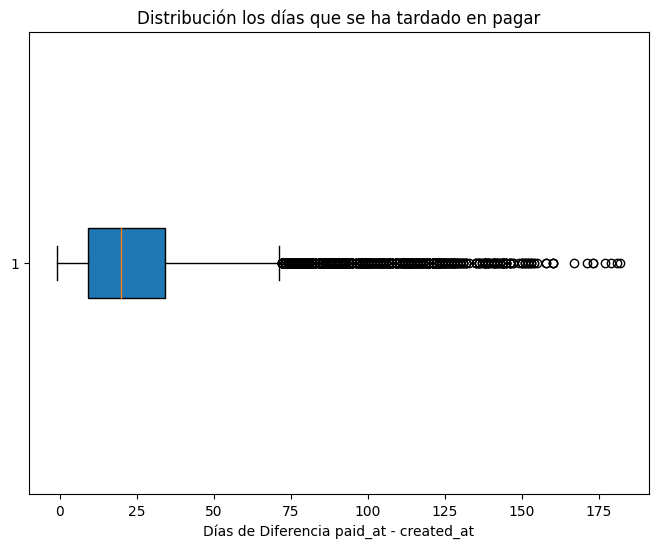

In [ ]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df_fees['days_difference'].dropna(), vert=False, patch_artist=True)
plt.title('Distribución los días que se ha tardado en pagar')
plt.xlabel('Días de Diferencia paid_at - created_at')
plt.show()

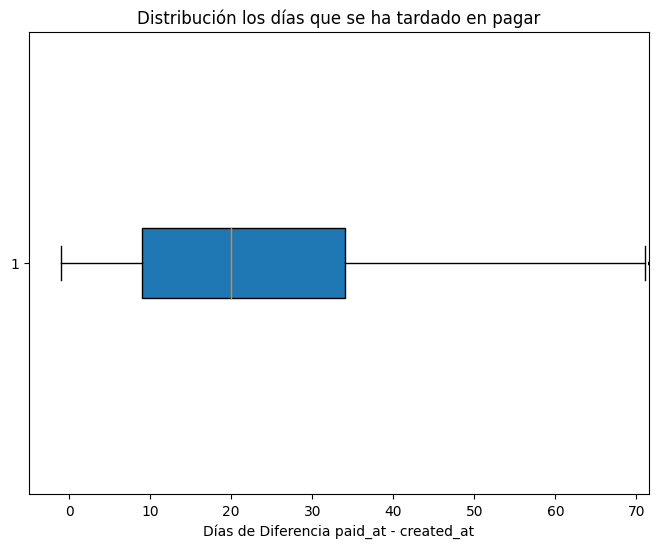

In [ ]:
# Crear el boxplot sin los outliers (entre Q1-1.5·IQR y Q3+1.5·IQR)
Q1 = df_fees['days_difference'].describe()["25%"]
Q3 = df_fees['days_difference'].describe()["75%"]

plt.figure(figsize=(8, 6))
plt.boxplot(df_fees['days_difference'].dropna(), vert=False, patch_artist=True)
plt.xlim(left=-5, right=Q3+1.5*(Q3-Q1))
plt.title('Distribución los días que se ha tardado en pagar')
plt.xlabel('Días de Diferencia paid_at - created_at')
plt.show()

In [ ]:
# Print de los extremos
print(f"Mínimo: {max(Q1-1.5*(Q3-Q1),0)}")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"Máximo: {Q3+1.5*(Q3-Q1)}")

Mínimo: 0
Q1: 9.0
Q3: 34.0
Máximo: 71.5


In [ ]:
# Contar cuantos casos son outliers y no estan representados en el gráfico (casos > Q3+1.5·IQR)
df_fees[df_fees['days_difference'] > Q3+1.5*(Q3-Q1)]['days_difference'].count()

972

In [ ]:
# Porcentaje
df_fees[df_fees['days_difference'] > Q3+1.5*(Q3-Q1)]['days_difference'].count() / len(df_fees) * 100

4.615165471724989

## Cómo se distribuyen los tipos de pagos? (instant_payment, incident, postpone)

* **¿Qué se busca comprender con este análisis?**

El objetivo de este análisis es entender la distribución de los diferentes tipos de pagos gestionados por IronHack Payments, específicamente las categorías de "instant_payment", "incident" y "postpone". Esta comprensión permite evaluar el rendimiento de los distintos métodos de pago y las implicaciones que tienen en la experiencia del cliente y en la gestión financiera de la empresa.


* **¿A través de qué métricas se busca?**

Para este análisis las métricas utilizadas son las de porcentaje de pagos instantáneos (cuantía de pagos instantáneos respecto al total de pagos realizados), el número absoluto de transacciones de cada categoría y la suma de todos los tipos de cuotas de intereses. Todo esto se complementa con una visualización del análisis con un gráfico circular.

* **Conclusión del análisis realizado**

El análisis revela que el 52.7% de los pagos son instantáneos, lo que indica una preferencia significativa por este método de pago. Además, la distribución de los tipos de cuotas de intereses es la siguiente: de Instant Payment tenemos 11,099 transacciones; de pagos postpuestos tenemos una cifra de 7,766 transacciones; y de incidentes tenemos 2,196 transacciones. La suma total de tipos de los tipos de cuotas de intereses es de 21,061. Esta información es crucial para entender la dinámica de los pagos en IronHack Payments, permitiendo a la empresa ajustar sus estrategias de marketing y gestión de pagos para mejorar la eficiencia y la satisfacción del cliente.


In [ ]:
# Se filtran los pagos instantáneos
instant = df_fees[df_fees["type"] == "instant_payment"]

# Se calcula el porcentaje de pagos instantáneos respecto la cantidad totales de pagos
str((instant["total_amount"].count() / len(df_fees) * 100).round(2)) + " %"

'52.7 %'

The type column is distributed as such: type
instant_payment    11099
postpone            7766
incident            2196
Name: count, dtype: int64

The sum of all types of incidents (instant_payment, postpone, incident) is 21061

La representación de la diversidad de incidentes que ha tenido IronHack es la siguiente:



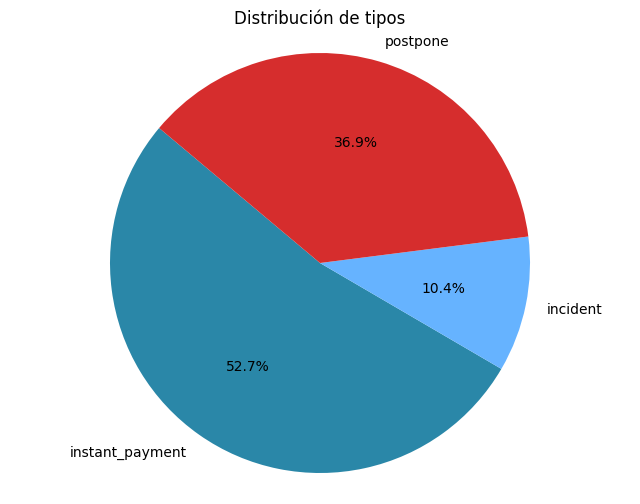

In [ ]:
total_types = df_fees['type'].value_counts()
print(f"The type column is distributed as such: {total_types}\n")

all_types = df_fees['type'].value_counts().sum()
print(f"La suma de todos los tipos (instant_payment, postpone, incident) es de {all_types}\n")

keys = ["instant_payment", "incident", "postpone"]
representación = [11099, 2196, 7766]

plt.figure(figsize=(8,6))
colours = ['#2a87a8', '#66b3ff', '#d62d2d', '#5c5a5a']
plt.pie(representación, labels=keys, autopct="%1.1f%%", startangle=140, colors=colours)
print("La representación de la diversidad de incidentes que ha tenido IronHack es la siguiente:\n")
plt.title("Distribución de tipos")
plt.axis("equal")
plt.show()

## Cómo se distribuyen los días de retraso de pago? (to_date - from_date)

* **¿Qué se busca comprender con este análisis?**

El objetivo de este análisis es evaluar la distribución de los días de retraso en los pagos, definidos como la diferencia entre la fecha de reembolso inicial ("from_date") y la nueva fecha de reembolso ("to_date"). Además, examinaremos la distribución de las categorías de incidentes.

Se busca determinar cuántos casos se han visto afectados por retrasos, así como identificar la media de días de retraso y la presencia de posibles outliers en los datos. E identificar la frecuencia de los diferentes tipos de incidentes.

* **¿A través de qué métricas se busca?**

Para realizar este análisis se han utilizado las siguientes métricas: Reconocer el total de fechas de las columnas "from_date" y "to_date"; La diferencia de días entre las fechas de las dos columnas y la búsqueda del promedio de días de retraso en los pagos. Estas métricas son la base de la visualización con un diagrama de cajas y bigotes que resalta la variabilidad y la mediana.

Para la categoría de incidentes examinaremos el número tota en cada categoría, la cantidad total de incidentes registrados (para contextualizar los datos) y una representación visual en un gráfico circular para mostrar el porcentaje de las diferentes categorías.

* **Conclusión del análisis realizado**

El análisis nos muestra que la cantidad total de fechas iniciales ("from_dates") es 7,766, y la misma cantidad aplica para las fechas de reembolso ("to_dates"). Una verificación de datos calculables reveló que hay 6,749 fechas iniciales y 6,512 fechas finales disponibles para el análisis. La media de días de retraso es de aproximadamente 20.38 días. Y el diagrama de cajas y bigotes permite visualizar la distribución de los días de retraso, sin outliers presentes. Esta información es valiosa para identificar patrones en los retrasos de pago y gestionar mejor los plazos de reembolso, lo que puede contribuir a una planificación financiera más efectiva.

Para destacar en problemas con la calidad de datos es que no hay emparejamiento perfecto en los datos "from_date" a "to_date".

Por lo que respecta a los incidentes (2196 en total), de "rejected_direct_debit" IronHack Payments ha tenido 1599 (representa el 72.7% del total), y de "month_delay_payment" ha tenido 597 (el 27,3% restante). Es importante reconocer las categorías de incidentes más frecuentes para reducir mejor la experiencia al consumidor.


In [ ]:
#Postpones: from_date (initial date of reimburse), to_date (new date of reimburse) - Cuántos hay? ¿Cuántos días de media entre from_to a to_date? boxplot (algún outlier?). Mix with cash_request_id.
from_dates = df_fees["from_date"].value_counts()
to_dates = df_fees["to_date"].value_counts()
total_from_dates_counts = from_dates.sum()
total_to_dates_counts = to_dates.sum()

print(f"{from_dates}\n.")
print(f"{to_dates}\n.")

print(f"La cantidad total de from_dates es de {total_from_dates_counts}.\n")
print(f"La cantidad total de to_dates es de {total_to_dates_counts}.\n")

df_fees = df_fees.copy()

# Convertir las columnas a formato datetime
df_fees['from_date'] = pd.to_datetime(df_fees['from_date'], errors='coerce')
df_fees['to_date'] = pd.to_datetime(df_fees['to_date'], errors='coerce')

# Eliminar NaN
df_fees.dropna(subset=["from_date", 'to_date'])

# Verificamos que hay igual de datos
total_from_dates_counts = df_fees["from_date"].value_counts().sum()
total_to_dates_counts = df_fees["to_date"].value_counts().sum()
print(f"Verificación de datos from_dates calculables tenemos {total_from_dates_counts}.\n")
print(f"Verificación de datos to_dates calculables tenemos {total_to_dates_counts}.\n")

# Calcular la diferencia en días
df_fees['postpone_days_difference'] = (df_fees['to_date'] - df_fees['from_date']).dt.days

# Calcular la media de días
print(f"La media de días es de {df_fees['postpone_days_difference'].mean()}.")

from_date
2020-10-05 22:00:00+00:00    297
2020-11-05 22:00:00+00:00    281
2020-09-04 22:00:00+00:00    241
2020-08-05 22:00:00+00:00    241
2020-09-07 22:00:00+00:00    207
                            ... 
2020-06-04 22:48:40+00:00      1
2020-09-19 23:51:00+00:00      1
2020-09-14 17:14:05+00:00      1
2020-09-19 10:00:00+00:00      1
2020-11-09 23:00:00+00:00      1
Name: count, Length: 454, dtype: int64
.
to_date
2020-11-06 11:00:00+00:00    192
2020-11-05 11:00:00+00:00    187
2020-10-30 23:00:00+00:00    150
2020-10-04 22:00:00+00:00    148
2020-09-04 22:00:00+00:00    124
                            ... 
2020-10-03 23:51:00+00:00      1
2020-10-04 04:00:00+00:00      1
2020-11-09 23:51:00+00:00      1
2020-10-06 16:00:00+00:00      1
2020-08-06 12:22:58+00:00      1
Name: count, Length: 486, dtype: int64
.
La cantidad total de from_dates es de 6749.

La cantidad total de to_dates es de 6512.

Verificación de datos from_dates calculables tenemos 6749.

Verificación de datos to_d

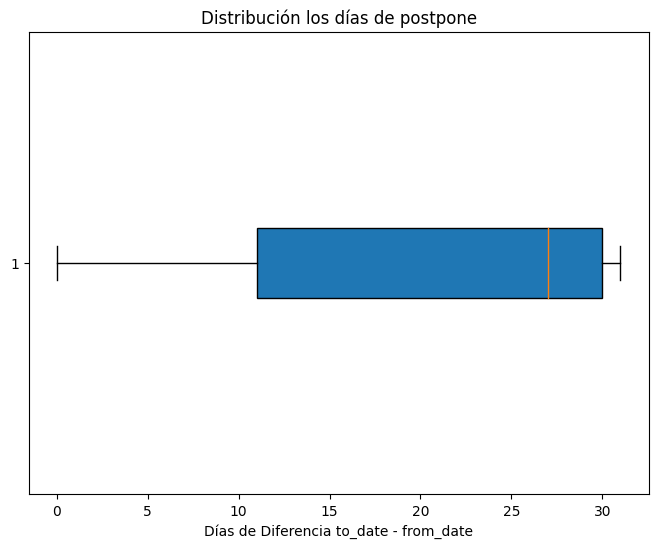

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_fees['postpone_days_difference'].dropna(), vert=False, patch_artist=True)
plt.title('Distribución los días de postpone')
plt.xlabel('Días de Diferencia to_date - from_date')
plt.show()

## Como han sido los incidentes?


In [ ]:
cat_counts = df_fees['category'].value_counts()
total_cat_counts = cat_counts.sum()
print(cat_counts)
print(f"La suma del total de las categorías es de {total_cat_counts}.\n")

category
rejected_direct_debit     1599
month_delay_on_payment     597
Name: count, dtype: int64
La suma del total de las categorías es de 2196.



##  Como se distribuyen las razones de incidentes? (rejected_direct_debit or month_delay_on_payment).

La representación de la diversidad de incidentes que ha tenido IronHack es la siguiente:



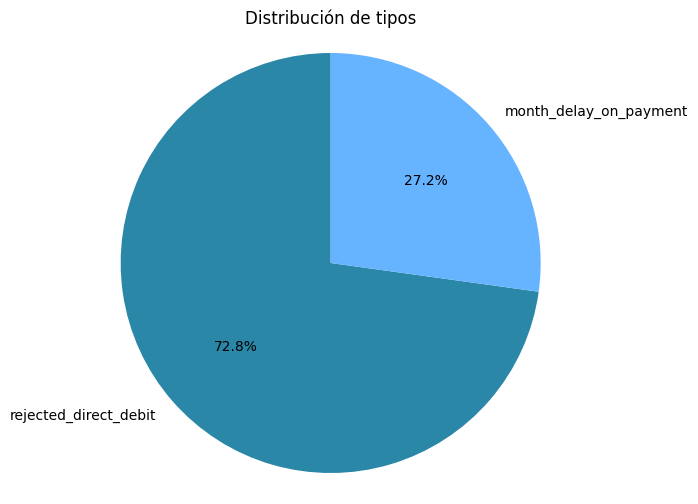

In [ ]:
keys = ["rejected_direct_debit", "month_delay_on_payment"]
representación = [1599, 597]

plt.figure(figsize=(8,6))
colours = ['#2a87a8', '#66b3ff', '#d62d2d', '#5c5a5a']
plt.pie(representación, labels=keys, autopct="%1.1f%%", startangle=90, colors=colours)
print("La representación de la diversidad de incidentes que ha tenido IronHack es la siguiente:\n")
plt.title("Distribución de tipos")
plt.axis("equal")
plt.show()

# Análisis exploratorio de datos (Cash_request)

* **¿Qué se busca comprender con este análisis?**

El objetivo de este análisis es examinar la distribución de las cantidades solicitadas en las solicitudes de adelanto de capital. Esto ayuda a identificar las cantidades más comunes y proporciona información valiosa sobre las preferencias de los usuarios.

* **¿A través de qué métricas se busca?**

La métrica utilizada para examinar la distribución de las cantidades solicitadas es la de la frecuencia de cada cantidad solicitad(conocer de cuántas veces se solicita cada cantidad específica). Para visualizarlo se ha utilizado una gráfica de barras.


* **Conclusión del análisis realizado**

Al analizar los datos, se escogieron las tres cantidades solicitadas con más frecuencia (se identificaron 38 cantidades más que no fueron representadas en el gráfico por su baja tasa de solicitud), estas siendo 100 EUR con un total de 16,094 solicitudes; 50 EUR con un total de 5,304 solicitudes; y 25 EUR con un total de 1,276 solicitudes. Esto indica que los usuarios tienden a solicitar montos altos, lo que puede ser relevante para la gestión de flujos de efectivo. Además, de las 38 cantidades que no tienen tan alta solicitud sugieren una variedad de solicitudes que podrían ser exploradas en futuros análisis para acotar la oferta.

El histograma proporciona una visión complementaria sobre la distribución de las cantidades solicitadas, mostrando la frecuencia de solicitudes en diferentes intervalos, lo que ayuda a entender mejor las tendencias de los usuarios.


In [ ]:
print(str(df_excel["Description"][6]))

Timestamp of the latest fee's details update


In [ ]:
df_cash_request.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [ ]:
df_cash_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

## Representar barplot de "Amount"

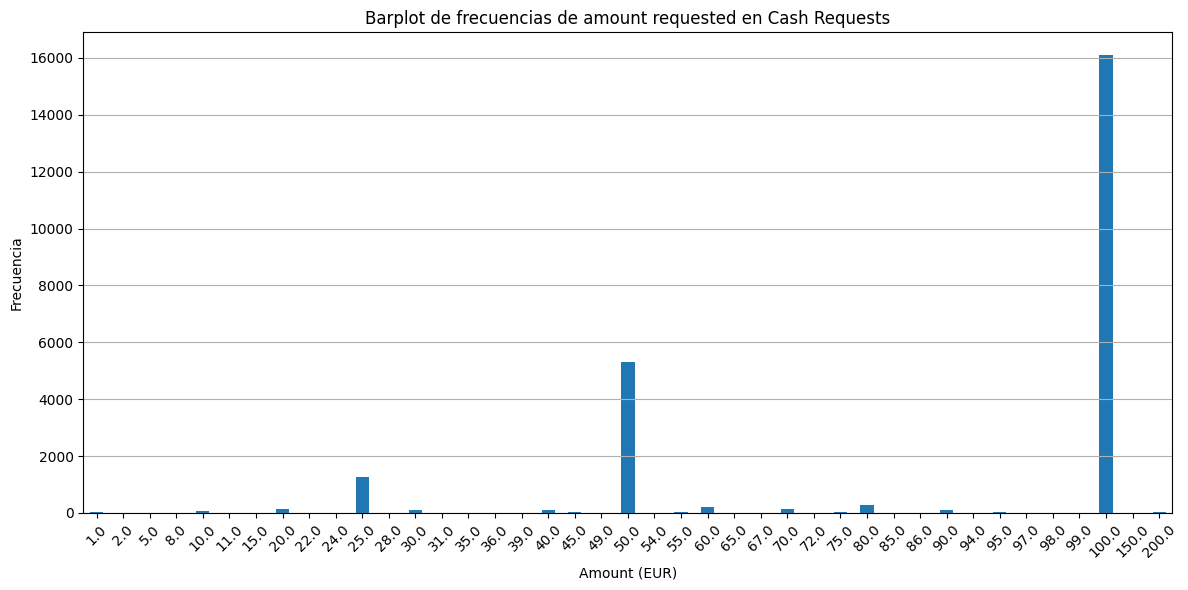

In [ ]:
data_amount = df_cash_request["amount"]
data2 = df_cash_request["amount"].count()

data_amount_eur = df_cash_request['amount'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
data_amount_eur.plot(kind='bar')
plt.title('Barplot de frecuencias de amount requested en Cash Requests')
plt.xlabel('Amount (EUR)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
data_amount_eur.value_counts()

,count
amount,
100.0,16094
50.0,5304
25.0,1276
80.0,267
60.0,190
70.0,151
20.0,132
30.0,114
40.0,100


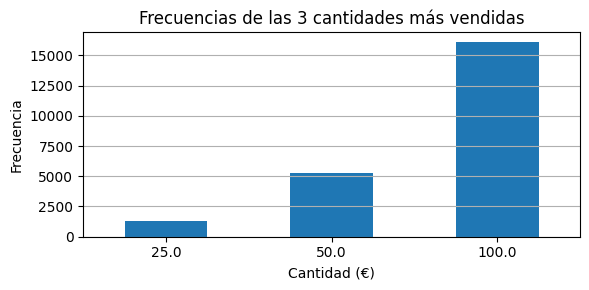

In [ ]:
# Solo representar los datos de 25, 50 y 100.
plt.figure(figsize=(6, 3))
data_amount_eur.value_counts().loc[[25, 50, 100]].plot(kind='bar')
plt.title('Frecuencias de las 3 cantidades más vendidas')
plt.xlabel('Cantidad (€)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Número de datos no representados en el gráfico anterior
data_amount_eur.value_counts().count() - data_amount_eur.value_counts().loc[[25, 50, 100]].count()

38

## Representar histograma de "Amount"

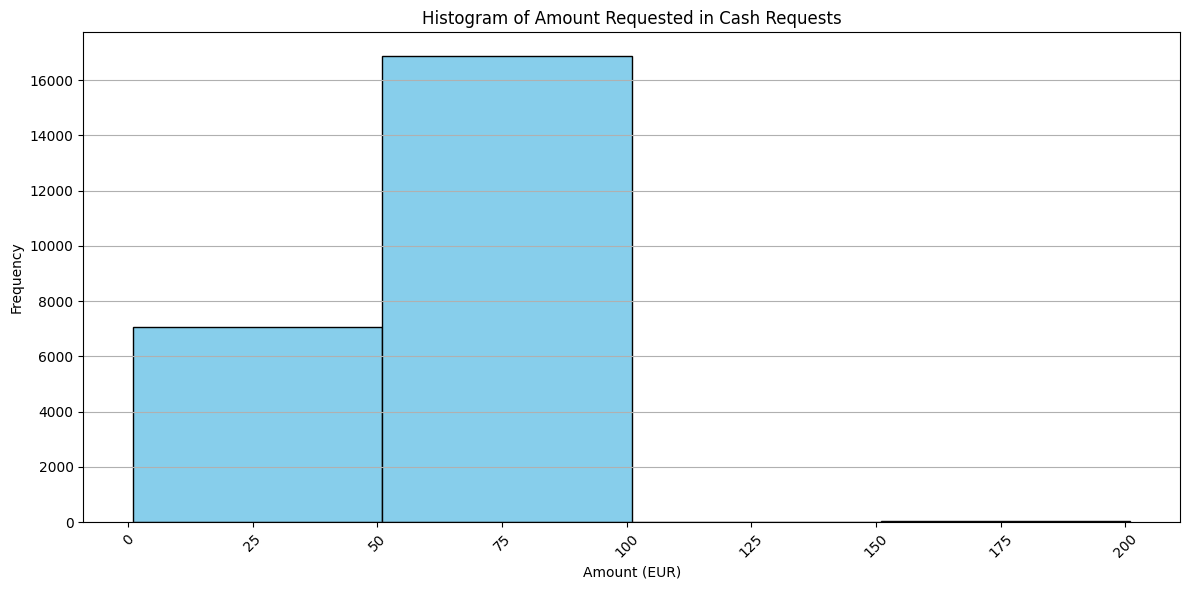

In [ ]:
data_amount_eur = df_cash_request['amount']

# Definir los bins (intervalos) del histograma
min_value = data_amount_eur.min()
max_value = data_amount_eur.max()
bins = np.arange(min_value, max_value + 50, 50)

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(data_amount_eur, bins=bins, edgecolor='black', color='skyblue')
plt.title('Histogram of Amount Requested in Cash Requests')
plt.xlabel('Amount (EUR)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Representar scatterplot "amount" amb el temps (reimbursement_date)

NOTA: freq-temps per cada categoria 50 100 i 200

Número de fechas no válidas: 20920


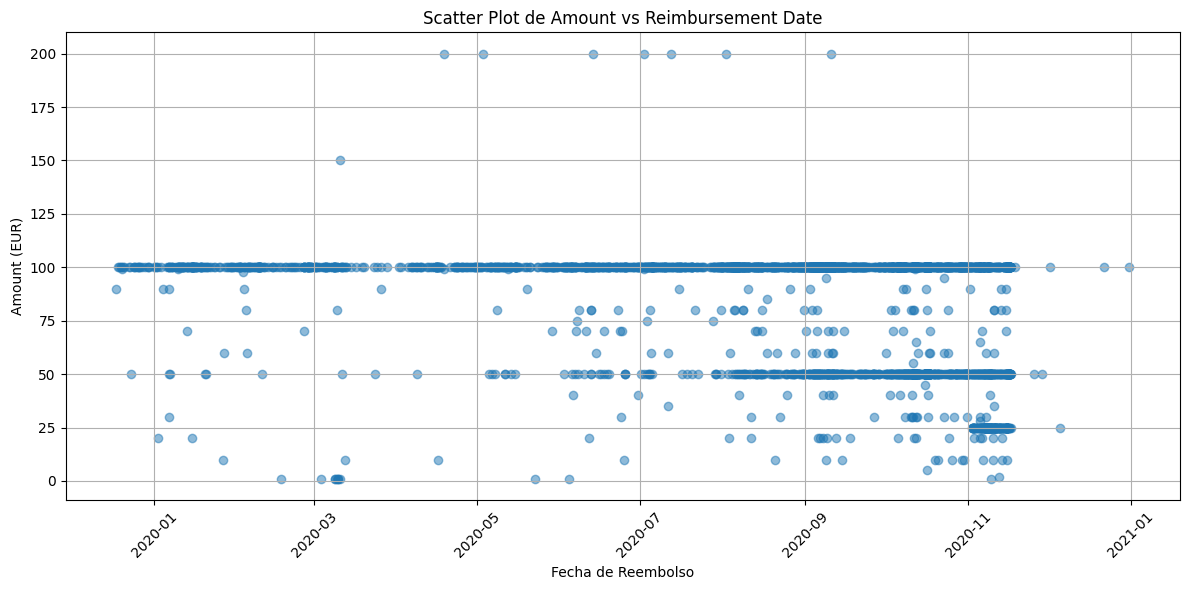

In [ ]:
# Supongamos que ya tienes tu DataFrame `df_cash_request`
df_cash_request['reimbursement_date'] = pd.to_datetime(df_cash_request['reimbursement_date'], errors='coerce')
df_valid_dates = df_cash_request[df_cash_request['reimbursement_date'].notna()]
invalid_dates = df_cash_request['reimbursement_date'].isna().sum()
print(f"Número de fechas no válidas: {invalid_dates}")

plt.figure(figsize=(12, 6))
plt.scatter(df_valid_dates['reimbursement_date'], df_valid_dates['amount'], alpha=0.5)
plt.title('Scatter Plot de Amount vs Reimbursement Date')
plt.xlabel('Fecha de Reembolso')
plt.ylabel('Amount (EUR)')
plt.xticks(rotation=45)
plt.grid()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Analizar transfer_type (instant or regular)

La representación de la diversidad de transfer_types que ha tenido IronHack es la siguiente:



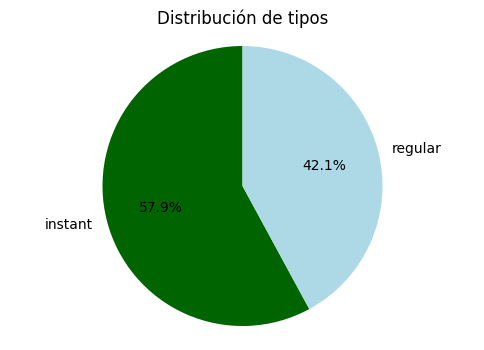

In [ ]:
transfer_type_data = df_cash_request["transfer_type"].value_counts()

transfer_keys = ["instant", "regular"]
transfer_representación = [13882, 10088]

plt.figure(figsize=(6,4))
colours = ['darkgreen', 'lightblue']
plt.pie(transfer_representación, labels=transfer_keys, autopct="%1.1f%%", startangle=90, colors=colours)
print("La representación de la diversidad de transfer_types que ha tenido IronHack es la siguiente:\n")
plt.title("Distribución de tipos")
plt.axis("equal")
plt.show()

La representación de la diversidad de transfer_types que ha tenido IronHack es la siguiente:



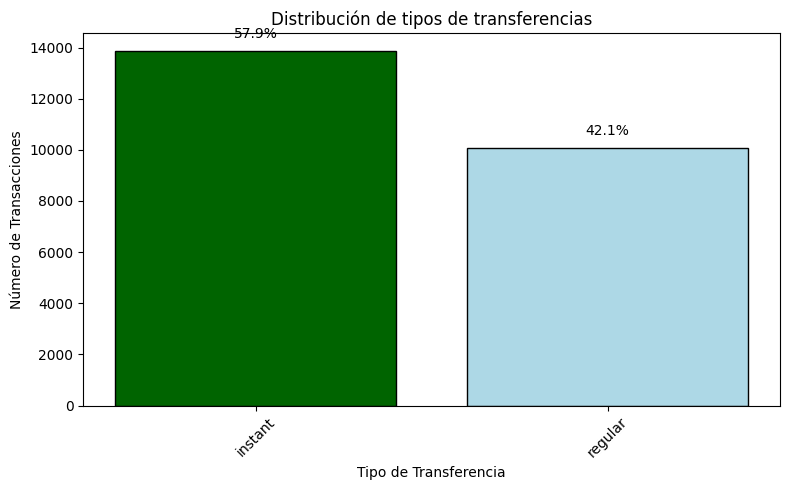

In [ ]:
# Definir keys y valores
transfer_keys = ["instant", "regular"]
transfer_representación = [13882, 10088]

print("La representación de la diversidad de transfer_types que ha tenido IronHack es la siguiente:\n")

# Crear el gráfico de barras
plt.figure(figsize=  (8, 5))
colours = ['darkgreen', 'lightblue']
plt.bar(transfer_keys, transfer_representación, color=colours, edgecolor='black')

# Añadir etiquetas y título
plt.title("Distribución de tipos de transferencias")
plt.xlabel("Tipo de Transferencia")
plt.ylabel("Número de Transacciones")
plt.xticks(rotation=45)

# Añadir un texto de proporciones en cada barra
for i, v in enumerate(transfer_representación):
    plt.text(i, v + 500, f"{(v/sum(transfer_representación)*100):.1f}%", ha='center')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



## Que ha hecho que los usuarios eliminen su cuenta?

* **¿Qué se busca comprender con este análisi?**

El objetivo es identificar los factores que han llevado a los usuarios a eliminar sus cuentas, analizando la relación entre el estado de la cuenta y las categorías de eliminación.


* **¿A través de qué métricas se busca?**

Las métricas utilizadas para examinar las desactivaciones de las cuentas son las siguientes: El total de cuentas procesadas y las cuentas activas actualmente de IronHack Payments.

* **Conclusión del análisis realizado**

El análisis revela que una gran proporción de las cuentas eliminadas se relaciona con transacciones rechazadas y devoluciones de dinero. En particular:

Respecto a las cuentas eliminadas, tenemos que el 64% corresponde a rechazos, mientras que un 34% son por devoluciones de dinero. Por lo que respecta a las cuentas activas la mayoría de las cuentas activas también reportan devoluciones de dinero como su estado más común, lo que sugiere que este podría ser un factor recurrente en la insatisfacción del usuario.

Este análisis es clave para entender las razones detrás de la eliminación de cuentas y puede guiar la implementación de estrategias para mejorar la experiencia del usuario y reducir la tasa de eliminación de cuentas.

In [ ]:
df_cash_request.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [ ]:
df_cash_request["status"].value_counts()

,count
status,
money_back,16397
rejected,6568
direct_debit_rejected,831
active,59
transaction_declined,48
direct_debit_sent,34
canceled,33


In [ ]:
total = len(df_cash_request['deleted_account_id'])
df_cash_request["active"] = df_cash_request['deleted_account_id'].isna()
df_cash_request["active"]

,active
0,True
1,True
2,True
3,True
4,True
...,...
23965,True
23966,False
23967,True
23968,True


In [ ]:
# Si deleted_accound_id NaN -> Significa que es una cuenta activa. Sino significa que es eliminada
total = len(df_cash_request['deleted_account_id'])
df_cash_request["active"].sum()

21866

In [ ]:
df_cash_request.groupby('active')['status'].value_counts()

active  status               
False   rejected                  1347
        money_back                 715
        canceled                    26
        direct_debit_rejected       16
True    money_back               15682
        rejected                  5221
        direct_debit_rejected      815
        active                      59
        transaction_declined        48
        direct_debit_sent           34
        canceled                     7
Name: count, dtype: int64

In [ ]:
df_cash_request.groupby('active')['status'].value_counts(normalize=True) * 100

active  status               
False   rejected                 64.020913
        money_back               33.982890
        canceled                  1.235741
        direct_debit_rejected     0.760456
True    money_back               71.718650
        rejected                 23.877252
        direct_debit_rejected     3.727248
        active                    0.269825
        transaction_declined      0.219519
        direct_debit_sent         0.155493
        canceled                  0.032013
Name: proportion, dtype: float64